In [1]:
# Requires Gadfly
using ApproxFun

INFO: Recompiling stale cache file /Users/solver/.julia/lib/v0.4/ApproxFun.ji for module ApproxFun.


# Poisson equation $u_{\theta\theta} + u_{\phi\phi} = f(\theta,\phi)$

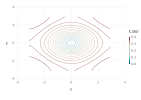

In [3]:
d=PeriodicInterval()^2
f=Fun((θ,ϕ)->exp(-10(sin(θ/2)^2+sin(ϕ/2)^2)),d)
A=lap(d)+.1I
u=A\f
ApproxFun.contour(u)

# Laplace equation  on the periodic strip $u_{\theta\theta} + u_{yy} = 0$

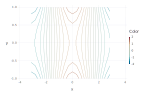

In [10]:
d=PeriodicInterval()*Interval()
g=Fun(z->real(cos(z)),∂(d))  # boundary data
u=[dirichlet(d);lap(d)]\g
ApproxFun.contour(u)

# Transport equation $u_t + u_\theta = 0$, $\theta \in (-2,2)$

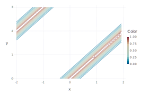

In [12]:
dθ=PeriodicInterval(-2.,2.);dt=Interval(0,3.)
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2)
u=[I⊗ldirichlet(dt);Dt+Dθ]\Fun(θ->exp(-20θ^2),dθ)
ApproxFun.contour(u)

We can interchange the variables using .'

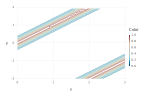

In [13]:
A=[ldirichlet(dt)⊗I;(Dt+Dθ).']
f=Fun(θ->exp(-20θ^2),dθ)
u=A\f
ApproxFun.contour(u)

# $u_t + (1+\cos \theta) u_\theta = 0$

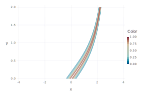

In [14]:
dθ=PeriodicInterval();dt=Interval(0,2.)
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2)
c=1+Fun(cos,dθ)

#timedirichlet is [u[x,0], u[-1,t], u[1,t]

u=[I⊗ldirichlet(dt);Dt+c*Dθ]\Fun(θ->exp(-20θ^2),dθ)
ApproxFun.contour(u)

# $u_t = \sin \theta \,u_\theta$

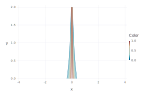

In [15]:
dθ=PeriodicInterval();dt=Interval(0,2.)
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2)
a=Fun(sin,dθ)

#timedirichlet is [u[x,0], u[-1,t], u[1,t]

u=[I⊗ldirichlet(dt);Dt-a*Dθ]\Fun(θ->exp(-20θ^2),dθ)
ApproxFun.contour(u)

# Convection Diffusion $u_t = \epsilon u_{\theta\theta} + u_\theta$

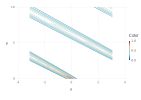

In [2]:
dθ=PeriodicInterval();dt=Interval(0,10.)
d=dθ*dt
ε=.01
Dθ=Derivative(d,1);Dt=Derivative(d,2)

# Parentheses are a hack to get rank 2 PDE
u=[I⊗ldirichlet(dt);Dt-ε*Dθ^2-Dθ]\Fun(θ->exp(-20θ^2),dθ)
ApproxFun.contour(u)

# Wave equation $u_{tt} = u_{\theta\theta}$

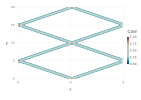

In [4]:
dθ=PeriodicInterval(-5.,5.);dt=Interval(0,20.)
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2)
# need to specify both ic and its derivative
B=[I⊗ldirichlet(dt);I⊗lneumann(dt)]
u=pdesolve([B;Dt^2-Dθ^2],Fun(θ->exp(-20(θ-.1)^2),dθ),200)
ApproxFun.contour(u)

# Linear KdV

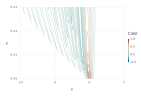

In [3]:
dθ=PeriodicInterval(-10.0,2.);dt=Interval(0,.03);
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2)
u=pdesolve([I⊗ldirichlet(dt);Dt+Dθ^3],Fun(θ->exp(-10θ^2),dθ),200)
ApproxFun.contour(u)

# Beam equation $$u_{tt}+u_{\theta\theta\theta\theta}=0$$

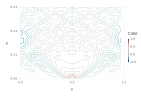

In [5]:
dθ=PeriodicInterval(0.0,1.0);dt=Interval(0,0.03)
d=dθ*dt
Dθ=Derivative(d,1);Dt=Derivative(d,2);

B=[I⊗ldirichlet(dt);I⊗lneumann(dt)]
u=pdesolve([B;Dt^2+Dθ^4],Fun(θ->exp(-200(θ-.5).^2),dθ),200)
ApproxFun.contour(u)